<h1>Tratar dados 'tampo.csv'</h1>

<h2>Pseudo código</h2>
<ul>
<li>Importar bibliotecas</li>
<li>Importar dados</li>
<li>Vizualizar dados e ver as anomalias e tamanho dos dados</li>
<li>Corrigir as anomalias usando ferramentas e bibliotecas estatisticas</li>
<li>Conferir se todos os dados estão dentro do padrão</li>
</ul>

In [1]:
# Importar bibliotecas

# pandas para manipulação de dados Análise exploratoria e estrutura de dados
import pandas as pd

# Criar visualizações de estatísticas bem atrativo e analise de dados exploratoria e 
# funciona bem com dataframes do panda
import seaborn as srn

# Para calcular dados estatisticas como média, mediana e desvio padrão.
import statistics as sts

In [2]:
# importar dados
dataset = pd.read_csv("tempo.csv", sep=";")

#  visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [4]:
# Explorar categoricamente as colunas começando por 0 
agrupado = dataset.groupby(['Aparencia']).size()
agrupado


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

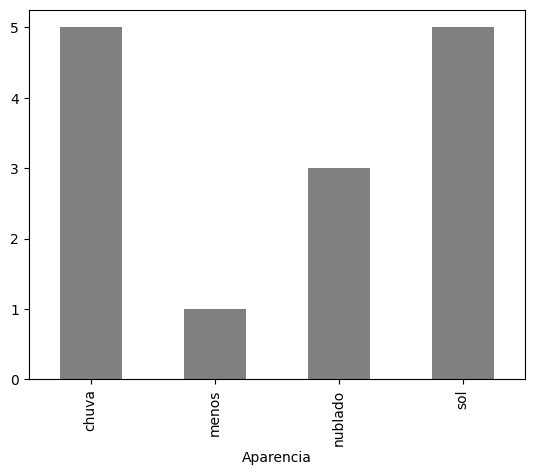

In [5]:
# Usando graficos
agrupado.plot.bar(color= 'gray')

In [6]:
#atemperatura explorando colunas numericas
#score
dataset['Temperatura'].describe()



count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

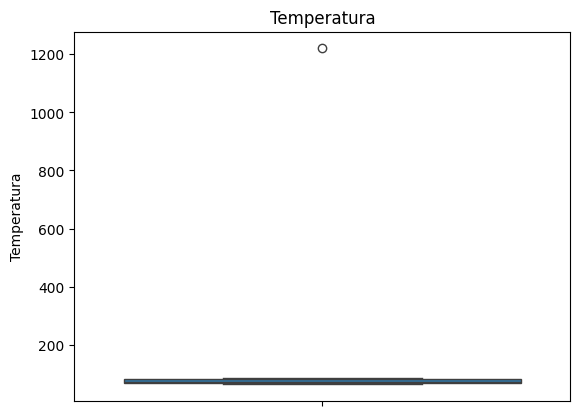

In [7]:
# graficos
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

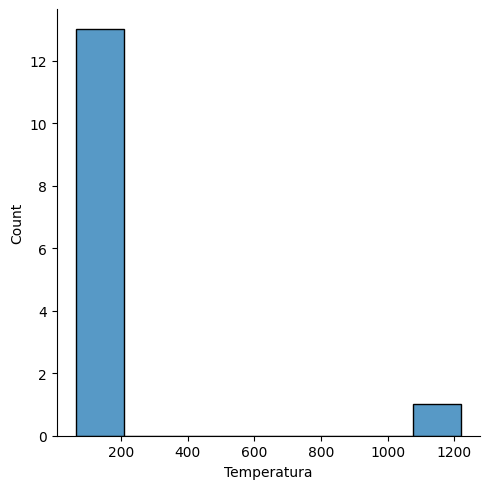

In [8]:
# graficos numericos
srn.displot(dataset['Temperatura']).set_title('Temperatura')

In [9]:
# idade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

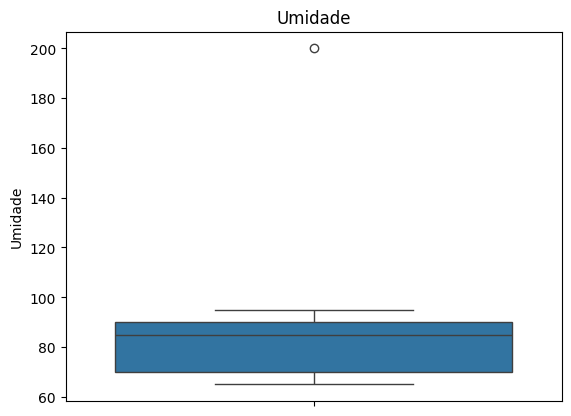

In [10]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

AttributeError: 'FacetGrid' object has no attribute 'set_title'

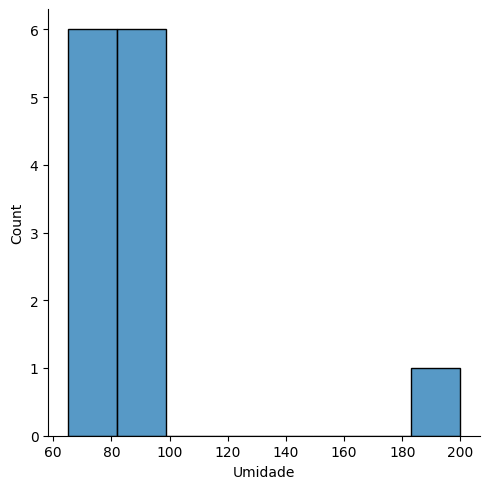

In [11]:
srn.displot(dataset['Umidade']).set_title('Umidade')

In [12]:
# jogar
agrupado = dataset.groupby('Vento').size()

agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [13]:
# Jogar

agrupado = dataset.groupby('Jogar').size()

agrupado

Jogar
nao    5
sim    9
dtype: int64

In [14]:
# contando valores igual a null NA'set
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [15]:
# tratar valores NA'set
# subistituir os valores NA's pela
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [16]:
# chamando a mediana 
mediana = sts.median(dataset['Umidade'])

mediana

85.5

In [17]:
# substituir o NA
dataset['Umidade'].fillna(mediana, inplace=True)

C:\Users\Lukas-PC\AppData\Local\Temp\ipykernel_9080\2064560832.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Umidade'].fillna(mediana, inplace=True)


In [18]:
# Vendo se há VAlores NA's
dataset['Umidade'].isnull().sum()

np.int64(0)

In [19]:
# Tratando valores NA's em vento e vendo quantas NA"s tem
dataset['Vento'].isnull().sum()

np.int64(1)

In [20]:
#identificando o valor moda
agrupado = dataset.groupby(['Vento']).size()

agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [21]:
# subistituindo a NA's pelo valor (Moda)
dataset['Vento'].fillna('FALSO', inplace=True)

C:\Users\Lukas-PC\AppData\Local\Temp\ipykernel_9080\1607198580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Vento'].fillna('FALSO', inplace=True)


In [22]:
# verificar se a valores NA's
dataset['Vento'].isnull().sum()

np.int64(0)

In [23]:
# tratando valores fora de padrão aparencia
agrupado = dataset.groupby(['Aparencia']).size()

agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [24]:
# Padroniar o acordo com o dominio
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = "chuva"

agrupado = dataset.groupby(['Aparencia']).size()

agrupado

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [25]:
#Temperaturas fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [26]:
# vizualizar 
dataset.loc[(dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [27]:
mediana = sts.median(dataset['Temperatura'])

mediana

73.5

In [28]:
# Subistituir valores anormais pela mediana
dataset.loc[(dataset['Temperatura'] > 130)] = mediana

C:\Users\Lukas-PC\AppData\Local\Temp\ipykernel_9080\1986262904.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '73.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.loc[(dataset['Temperatura'] > 130)] = mediana


In [29]:
# verificando selgo está fora do dominio
dataset.loc[(dataset['Temperatura'] > 130)]

dataset['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

In [30]:
# umidade

dataset['Umidade'].describe()

count     14.000000
mean      87.928571
std       33.425495
min       65.000000
25%       70.875000
50%       82.500000
75%       89.000000
max      200.000000
Name: Umidade, dtype: float64

In [31]:
#Verificando

dataset.loc[(dataset['Umidade'] > 100)]



,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [32]:
# substituir pela mediana
dataset['Umidade'].describe()

count     14.000000
mean      87.928571
std       33.425495
min       65.000000
25%       70.875000
50%       82.500000
75%       89.000000
max      200.000000
Name: Umidade, dtype: float64

In [33]:
# Calculando a mediana
mediana = sts.median(dataset['Umidade'])

mediana

82.5

In [34]:
dataset.loc[(dataset['Umidade'] > 100)] = mediana

In [35]:
# verificando 
dataset.loc[(dataset['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [36]:
# verificando
dataset['Umidade'].describe()

count    14.000000
mean     79.535714
std       8.804423
min      65.000000
25%      70.875000
50%      81.250000
75%      85.875000
max      91.000000
Name: Umidade, dtype: float64

In [37]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
